In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #ok
#mostrar todas las col.
pd.set_option('display.max_columns', None) #ok
from sklearn import preprocessing #ok
from sklearn.preprocessing import StandardScaler #ok
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso #ok
from sklearn.linear_model import Ridge #ok
#Quitar los warning
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

<div class = "alert alert-success">CARGA DE DATAFRAME</div>

In [2]:
#UTILIZO DF_PRACTICA POR SI COMETO ERRORES.
df_practica = pd.read_csv('./airbnb-listings-extract.csv',
                          sep=';',
                          decimal='.')
print("Hay",df_practica.shape[0],"filas")

Hay 14780 filas


<div class = "alert alert-success">TRANSFORMACION GENERAL</div>

In [3]:
df_practica = df_practica[df_practica["City"]=="Madrid"]
print("Luego de eliminar las columnas que no pertenecen a Madrid quedaron:",df_practica.shape[0],"filas")

Luego de eliminar las columnas que no pertenecen a Madrid quedaron: 13207 filas


In [4]:
# Filtar las columnas que contengan algunas palabras clave.
#Url de perfile y id's y fechas.
filtered_cols = [col for col in df_practica.columns if any(word in col for word in ["Calendar","Time","Scrape","Pictures","Photo","URL","url","Url","ID","id","Id"])]

print("Se eliminaran las siguientes columnas antes de dividir TRAIN/TEST.")
print(filtered_cols)
df_practica = df_practica.drop(columns=filtered_cols)
print("\n quedaron:\n",df_practica.shape[1],"columnas")

Se eliminaran las siguientes columnas antes de dividir TRAIN/TEST.
['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Response Time', 'Host Thumbnail Url', 'Host Picture Url', 'Calendar Updated', 'Calendar last Scraped']

 quedaron:
 74 columnas


In [5]:
# Guardo los cambios realizados en un nuevo DF.
df_practica.to_csv("airbnb.csv", index=False)
print("Se guardó")

Se guardó


<div class = "alert alert-success">CARGA DE DATAFRAME </div>

In [25]:
full_df = pd.read_csv('./airbnb.csv', sep=',', decimal='.',index_col=None)
full_df['Square Feet'] = full_df['Square Feet'].apply(lambda x: x * 0.3048 * 0.3048)
full_df[['Price'] + [col for col in full_df.columns if col != 'Price']]

,Price,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host Name,Host Since,Host Location,Host About,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,28.0,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",NaN,Metro conde de Casal abajo de casa . Líneas de...,"Pueden usar la nevera , microondas , wifi .",Cualquier cosa Q necesiten estaremos para ayud...,Si son fumadores podéis fumar en un patio Q h...,Vílma,2015-01-06,"Madrid, Community of Madrid, Spain",NaN,84.0,NaN,NaN,3.0,3.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28007, Spain",NaN,Niño Jesús,Retiro,Madrid,Comunidad de Madrid,28007,Madrid,"Madrid, Spain",ES,Spain,40.406953,-3.670894,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",NaN,NaN,NaN,NaN,NaN,1,5,1,1125,NaN,0,3,12,240,171,2015-06-14,2017-03-22,87.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
1,58.0,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,NaN,NaN,En dos agradables sillones puedes tomar un caf...,Te atenderemos en todo lo que necesites. Marta...,No se permite fumar. El estudio está acondicio...,Marta,2015-01-01,"Madrid, Community of Madrid, Spain",NaN,100.0,NaN,Recoletos,1.0,1.0,"email,phone,reviews","Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Recoletos,Salamanca,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,Spain,40.425904,-3.681647,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,371.0,981.0,100.0,NaN,1,0,2,1125,NaN,4,9,9,15,52,2015-03-02,2017-02-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
2,70.0,Studio & Terrace - Barrio Salamanca,"Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...",none,"The Studio is located in a quiet street, in th...","Check in time is at 3pm or later, although som...",PUBLIC TRANSPORT Subway/Metro station Serrano ...,"During the stay, guests have access to the ent...",Guests can expect access to any information / ...,SPANISH: - No se permiten fiestas ni reuniones...,Comunicaciones Waterloo S.L,2016-04-18,ES,Hi! \r\n\r\nI travel a lot - for work and - th...,100.0,NaN,Recoletos,2.0,2.0,"email,phone,reviews,jumio,government_id","Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Recoletos,Salamanca,Madrid,Comunidad de Madrid,28001,Madrid,"Madrid, Spain",ES,Spain,40.428352,-3.687155,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,NaN,NaN,150.0,30.0,2,15,2,1125,NaN,7,15,32,292,

In [26]:
full_df = pd.read_csv('./airbnb.csv', sep=',', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=',', decimal='.', index=False)
test.to_csv('./test.csv', sep=',', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

dataframe_train = pd.read_csv('./train.csv', sep=',', decimal='.')
dataframe_test = pd.read_csv('./test.csv', sep=',', decimal='.')

Dimensiones del dataset de training: (10565, 74)
Dimensiones del dataset de test: (2642, 74)


In [27]:
df_train = dataframe_train

df_test = dataframe_test

In [34]:
columns_to_drop = ["Host Acceptance Rate","Has Availability","Jurisdiction Names","Experiences Offered", "City", "Smart Location", "Country Code", "Country",'Zipcode',
'Name','Summary','Space','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules',
'Host Name','Host Since','Host Location','Host About','Host Neighbourhood','Host Listings Count','Host Total Listings Count',
'Host Total Listings Count','Host Verifications','Street','State','Market',
'Latitude','Longitude','Amenities','Maximum Nights','Availability 30','Availability 60','Availability 90','Availability 365',
'First Review','Last Review','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','License',
'Reviews per Month','Geolocation','Features']


cols_me = ['Neighbourhood','Neighbourhood Group Cleansed','Neighbourhood Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy']


new_column_names = {'Host Response Rate':'HRespRate',
                    'Room Type':'RoomType',
                    'Beds':'Beds',
                    'Bed Type':'BedType',
                    'Square Feet':'Meters',
                    'Weekly Price':'WeeklyPrice',
                    'Monthly Price':'MonthlyPrice',
                    'Security Deposit':'SecDeposit',
                    'Cleaning Fee':'CleaningFee',
                    'Guests Included':'GIncluded',
                    'Extra People':'EPeople',
                    'Minimum Nights':'MinNights',
                    'Number of Reviews':'NumReviews',
                    'Review Scores Checkin':'ScoreCheckin',
                    'Review Scores Communication':'ScoresCommunication',
                    'Review Scores Location':'ScoresLocation',
                    'Review Scores Value':'ScoresValue',
                    'Cancellation Policy':'CPolicy',
                    'Calculated host listings count':'CHostListCount',
                    'Neighbourhood_me_en':'Neighbourhood',
                    'Neighbourhood Group Cleansed_me_en':'NeighbourhoodGCleansed',
                    'Neighbourhood Cleansed_me_en':'NeighbourhoodCleansed',
                    'Property Type_me_en':'PropertyType'}


In [36]:
def mean_encoding(df, cols):
    for col in cols:
        mean_col = df.groupby(col)['Price'].mean()
        df[col] = df[col].map(mean_col)
    return df
#mean_encoding(df_train,cols_me)


def transform_data(df):
    df = df.drop(columns=columns_to_drop)
    df = mean_encoding(df, cols_me)
    df = df.rename(columns=new_column_names)
    mode_value = df.mode().iloc[0]
    df = df.fillna(mode_value)
    return df

def full_transform(df):
    df = transform_data(df)
    return df

In [40]:
train = full_transform(df_train)

test = full_transform(df_train)

<div class = "alert alert-success"> convertimos el DataFrame al formato necesario para scikit-learn </div>

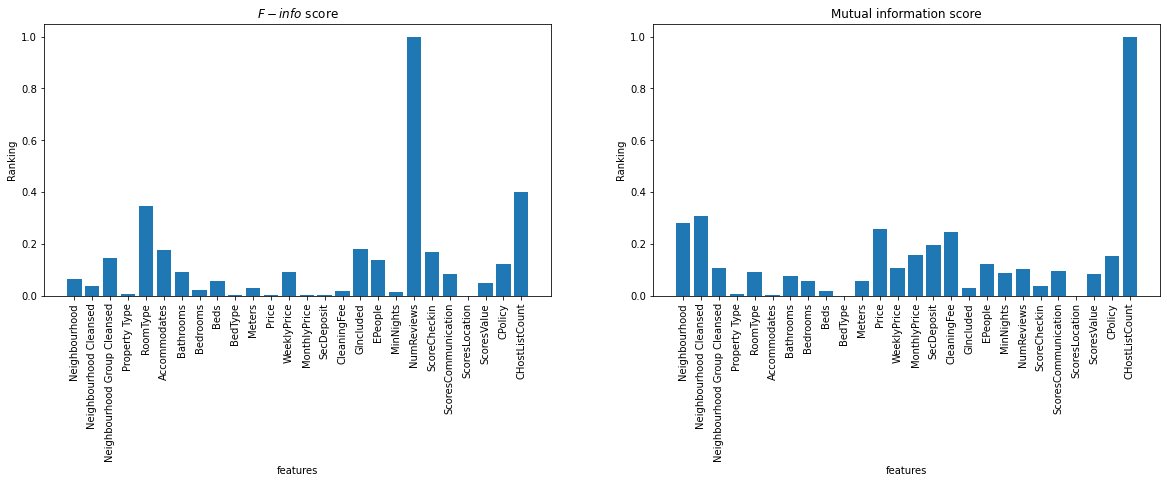

In [41]:
from sklearn.feature_selection import f_regression, mutual_info_regression

data = train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = train.columns[1:]


#valor de prueba
f_test, _ = f_regression(X_train, y_train)

#normalizarlo
f_test /= np.max(f_test)

#valor de información mutua
mi = mutual_info_regression(X_train, y_train)

#normalizarlo
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-info$ score')

plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi, align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [43]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# aplicarle LAS MISMAS transformaciones que hayáis hecho en train 
#(drop de columnas, filtros, generaciones, fill...) y sacar los datos:

df_test = test.values
y_test = df_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = df_test[:,1:]

# selecting only the columns present in the training dataset

feature_names = test.columns[1:]
# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
best mean cross-validation score: -204.293
best parameters: {'alpha': 0.04714866363457394}


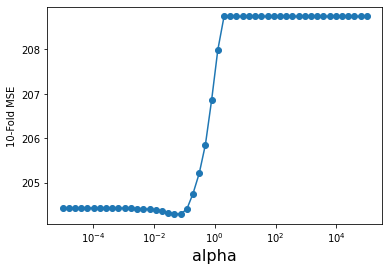

In [54]:
alpha_vector = np.logspace(-5,5,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10,verbose=1)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 203
MSE Modelo Lasso (test) : 203
RMSE Modelo Lasso (train): 14.3
RMSE Modelo Lasso (test) : 14.3
Neighbourhood 0.15982175513770205
Neighbourhood Cleansed -0.15655163297342387
Neighbourhood Group Cleansed 0.5600729894116443
Property Type -0.0
RoomType 0.5217455323641106
Accommodates 0.49769563893880364
Bathrooms -0.3337250192121105
Bedrooms 0.027962148913971707
Beds 0.0
BedType 0.01510214981195843
Meters 0.05127144964977485
Price -0.636217652719067
WeeklyPrice 0.07314442880690335
MonthlyPrice -0.2192115692799966
SecDeposit -0.14354299001837123
CleaningFee 0.5629026274857769
GIncluded 0.11369194839727721
EPeople 0.21861280297755933
MinNights 0.17504801504084702
NumReviews 1.1618944092194918
ScoreCheckin 0.474585539857845
ScoresCommunication -0.0
ScoresLocation -0.4231430850064629
ScoresValue 0.39634553323786575
CPolicy 0.432438360564881
CHostListCount -0.9756139498250285


Fitting 10 folds for each of 50 candidates, totalling 500 fits
best mean cross-validation score: -204.258
best parameters: {'alpha': 1456.3484775012444}


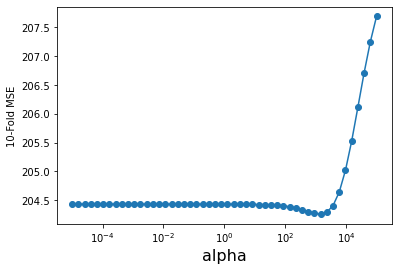

In [56]:
alpha_vector = np.logspace(-5,5,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=1) 
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [57]:
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

MSE Modelo Ridge (train): 203
RMSE Modelo Ridge (train): 14.3
MSE Modelo Ridge (test) : 203
RMSE Modelo Ridge (test) : 14.3


Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.065
best parameters: {'max_depth': 5}


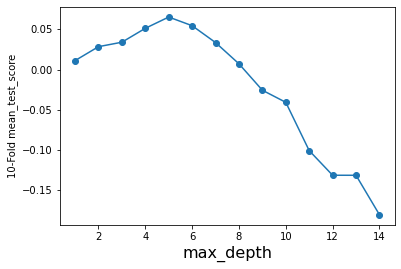

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# plot decide wich deph to use
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold mean_test_score')
plt.show()

In [59]:
max_depth = grid.best_params_['max_depth']
tree_model = DecisionTreeRegressor(random_state=0,max_depth=max_depth).fit(X_train,y_train)
print("Single Tree score (train):",tree_model.score(X_train,y_train))
print("Single Tree score (test):",tree_model.score(X_test,y_test))

y_train_tree = tree_model.predict(XtrainScaled)
mse_train_tree = mean_squared_error(y_train,y_train_tree)
print('MSE Single Tree (train): %0.3g' % mse_train_tree)
print('RMSE Single Tree (train): %0.3g' % np.sqrt(mse_train_tree))

y_test_tree = tree_model.predict(XtestScaled)
mse_test_tree = mean_squared_error(y_test,y_test_tree)
print('MSE Single Tree (test): %0.3g' % mse_test_tree)
print('RMSE Single Tree (test): %0.3g' % np.sqrt(mse_test_tree))


Single Tree score (train): 0.09548138310239163
Single Tree score (test): 0.09548138310239163
MSE Single Tree (train): 1.2e+03
RMSE Single Tree (train): 34.6
MSE Single Tree (test): 1.2e+03
RMSE Single Tree (test): 34.6


In [ ]:
from sklearn.ensemble import RandomForestRegressor

depth_range = range(1,18)
param_grid = {'max_depth': depth_range}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=param_grid,cv=10, verbose=1) 
grid.fit(X_train, y_train.ravel())

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(depth_range,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold')

plt.show() 


Fitting 10 folds for each of 17 candidates, totalling 170 fits
